In [64]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [65]:
bh_data = load_boston()


In [45]:
print(bh_data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [68]:
boston = pd.DataFrame(bh_data.data, columns = bh_data.feature_names)
boston['MEDV']  = bh_data.target 

In [69]:
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

In [70]:
boston.shape

(506, 14)

In [71]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [82]:
x = boston.iloc[:,:-1].values
y = boston.iloc[:,-1].values

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                   random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [84]:
print(regressor.intercept_)
print(regressor.coef_)

38.09169492630246
[-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


In [85]:
y_pred = regressor.predict(x_test)

In [86]:
dataframe = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

In [87]:
dataframe

Actual  Predicted
0      22.6  24.889638
1      50.0  23.721411
2      23.0  29.364999
3       8.3  12.122386
4      21.2  21.443823
..      ...        ...
97     24.7  25.442171
98     14.1  15.571783
99     18.7  17.937195
100    28.1  25.305888
101    19.8  22.373233

[102 rows x 2 columns]

In [89]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.842909220444498
Mean Squared Error: 33.44897999767653
Root Mean Squared Error: 5.783509315085135


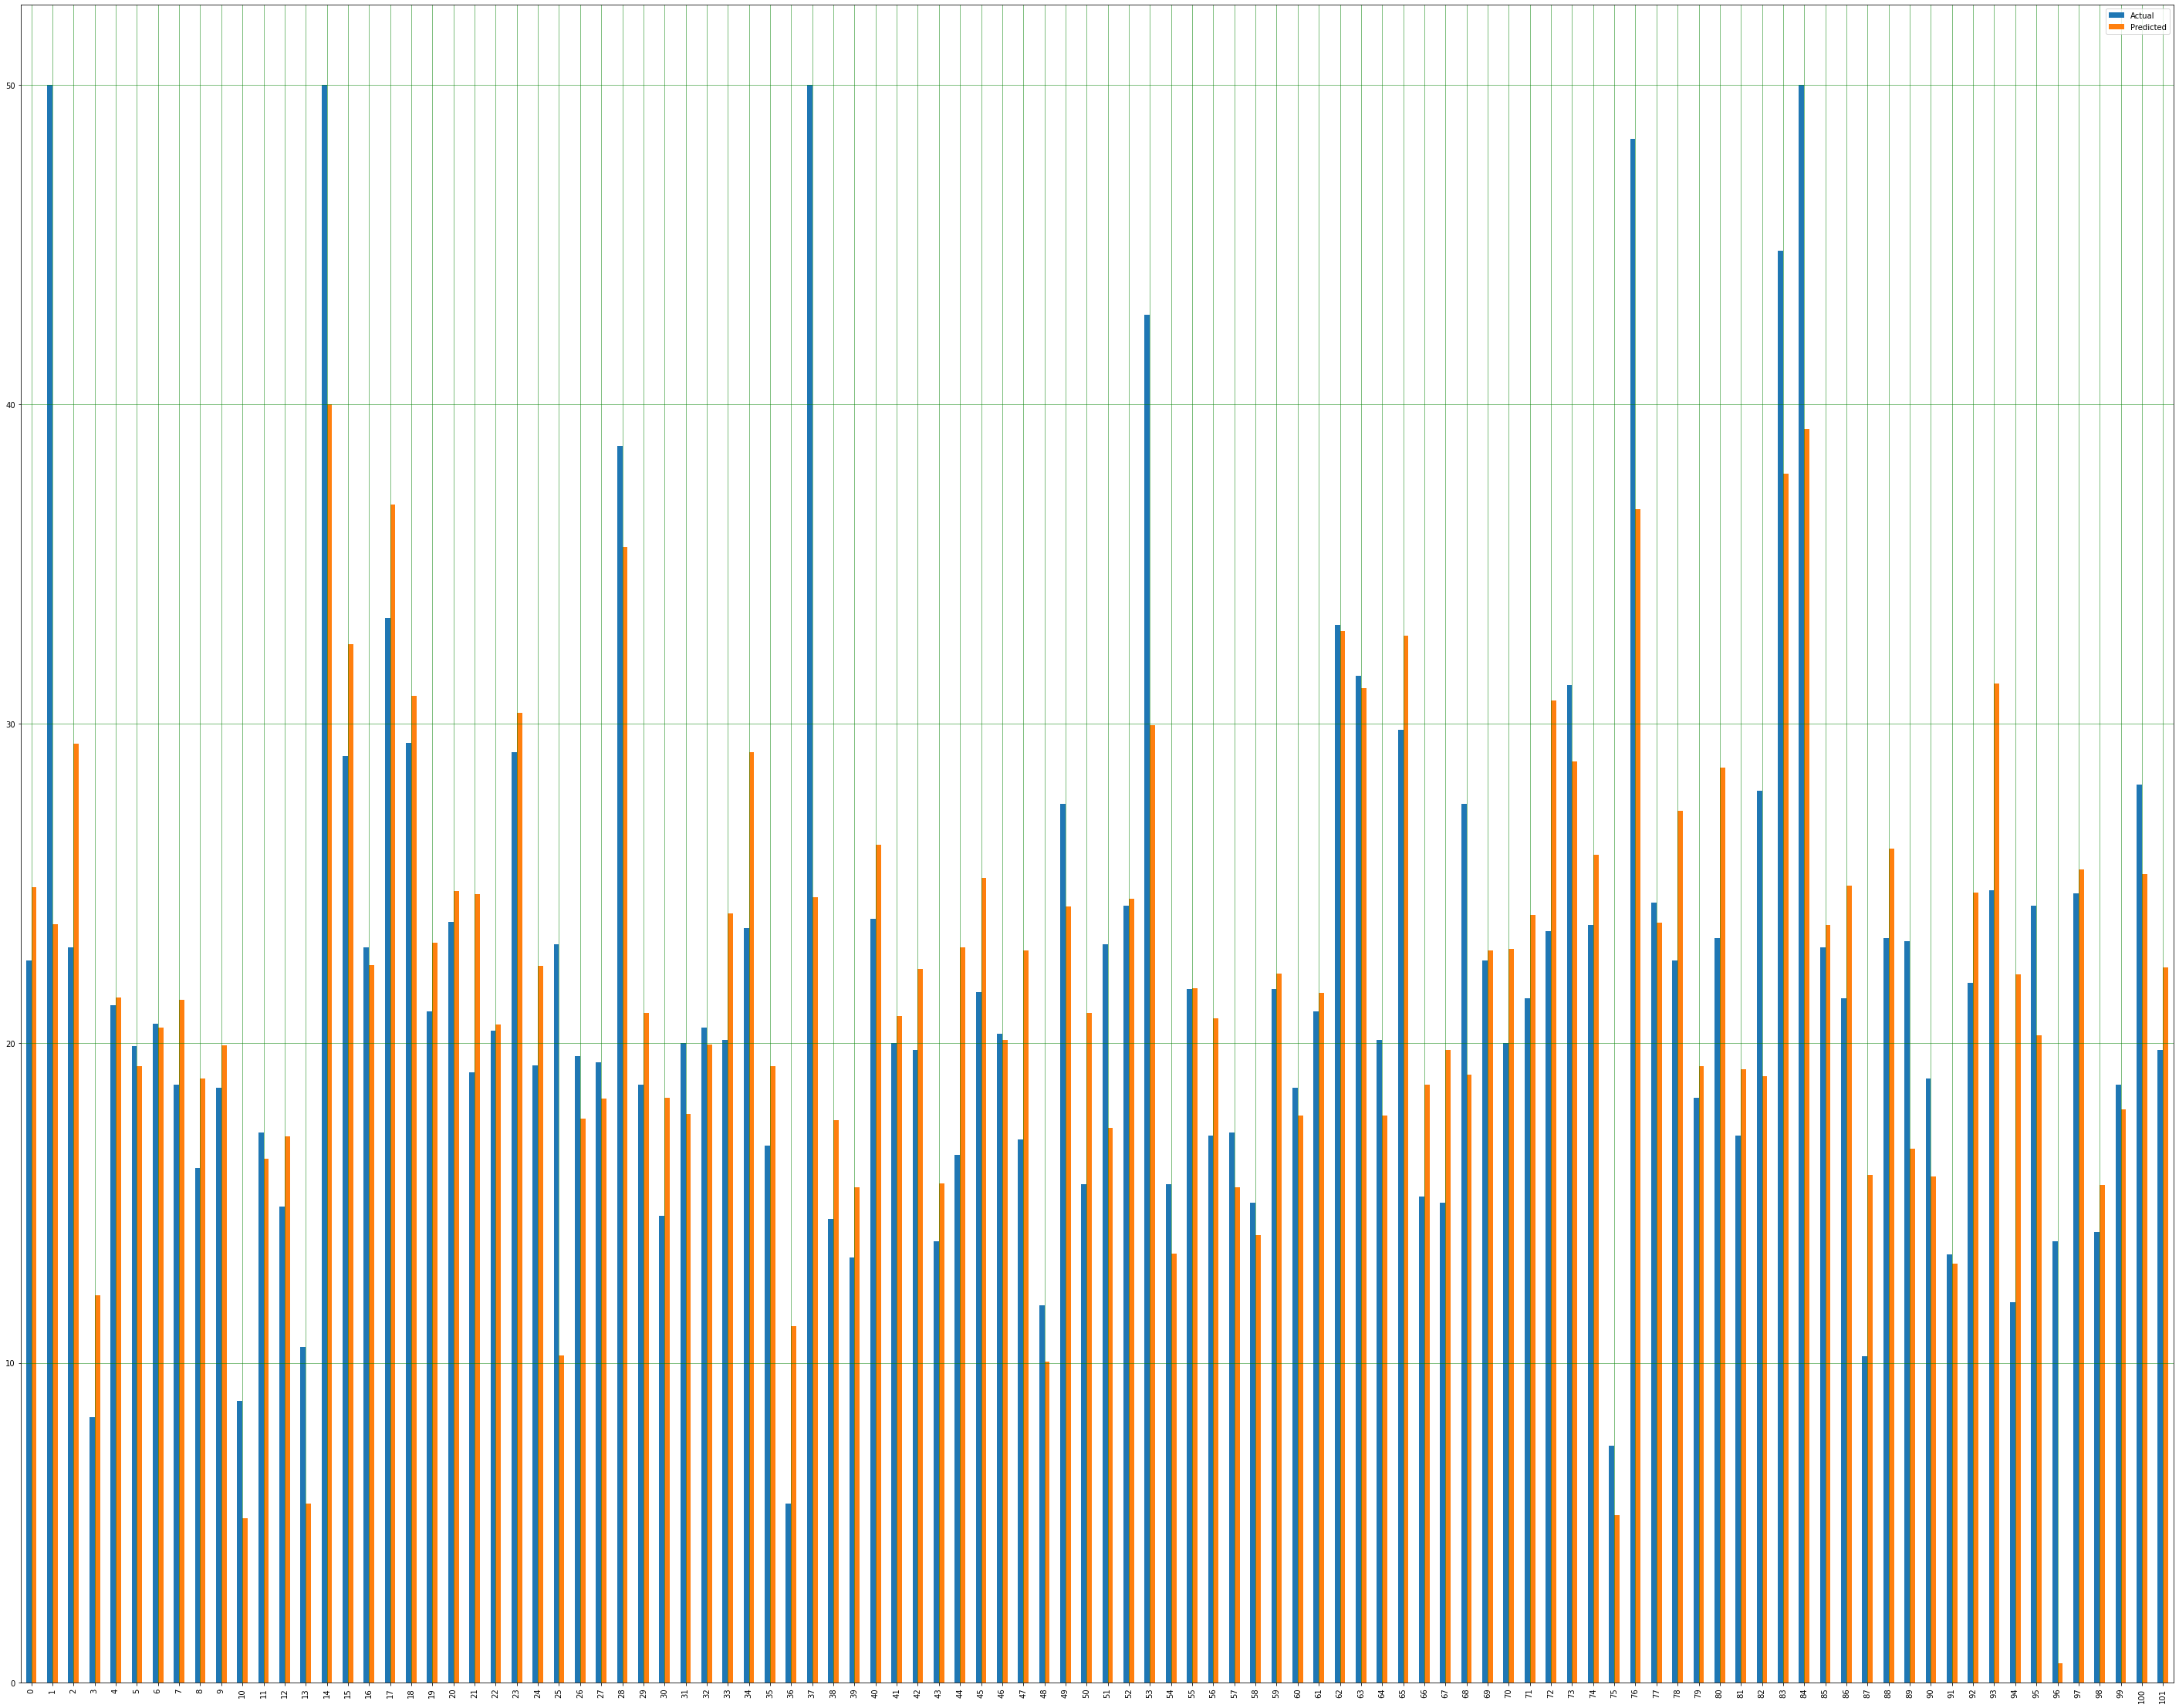

In [95]:
import matplotlib.pyplot as plt 
dataframe.plot(kind = 'bar', figsize = (50,40))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')

plt.show()

In [48]:
df = pd.read_csv('User_Data.csv')

In [49]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [50]:
df.shape

(400, 5)

In [51]:
df.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [52]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [53]:
df.Gender[df.Gender == 'Male'] = 1
df.Gender[df.Gender == 'Female'] = 0
df.head()

<ipython-input-53-1e1b7fa3fb7b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == 'Male'] = 1
<ipython-input-53-1e1b7fa3fb7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == 'Female'] = 0


User ID Gender  Age  EstimatedSalary  Purchased
0  15624510      1   19            19000          0
1  15810944      1   35            20000          0
2  15668575      0   26            43000          0
3  15603246      0   27            57000          0
4  15804002      1   19            76000          0

In [54]:
x = df.iloc[:,[2,3]].values
y = df.iloc[:,[4]].values

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [36]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(x_train)
xtest = sc_x.transform(x_test)

print(xtrain[0:10, :])

[[-1.1631724  -1.5849703 ]
 [ 2.17018137  0.93098672]
 [ 0.0133054   1.22017719]
 [ 0.20938504  1.07558195]
 [ 0.40546467 -0.48604654]
 [-0.28081405 -0.31253226]
 [ 0.99370357 -0.8330751 ]
 [ 0.99370357  1.8563962 ]
 [ 0.0133054   1.24909623]
 [-0.86905295  2.26126285]]


In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

D:\test\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(random_state=0)

In [58]:
y_pred = classifier.predict(x_test)

In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[79  0]
 [41  0]]


In [61]:
from sklearn.metrics import accuracy_score
print("accuracy: ", accuracy_score(y_test, y_pred))

accuracy:  0.6583333333333333


In [62]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79        79
           1       0.00      0.00      0.00        41

    accuracy                           0.66       120
   macro avg       0.33      0.50      0.40       120
weighted avg       0.43      0.66      0.52       120



D:\test\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
